In [1]:
# !pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 713M/715M [00:08<00:00, 33.2MB/s]
100% 715M/715M [00:08<00:00, 85.8MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [6]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.0 MB/s eta 0:00:00


In [7]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [8]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [9]:
filenames = os.listdir('/content/train')

In [10]:
print(filenames[:5])
print(filenames[-5:])

['39919.png', '14670.png', '20011.png', '49214.png', '25186.png']
['49695.png', '28799.png', '29641.png', '28455.png', '22271.png']


In [11]:
print(filenames[0])

39919.png


In [12]:
len(filenames)

50000

Labels Processing

In [13]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [14]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [15]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [16]:
# Checking the distribution of each class
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [17]:
type(labels_df['label'])

pandas.core.series.Series

In [18]:
# Assigning each 10 classes with a number in an alphabetical order
labels_dictionary = {'airplane': 0,
                     'automobile': 1,
                     'bird': 2,
                     'cat': 3,
                     'deer': 4,
                     'dog': 5,
                     'frog': 6,
                     'horse': 7,
                     'ship': 8,
                     'truck': 9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [19]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


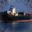

In [20]:
# Displaying a sample image
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/train/39919.png')
cv2_imshow(image)

In [21]:
labels_df[labels_df['id'] == 39919 ]

,id,label
39918,39919,ship


In [22]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [23]:
id_list = list(labels_df['id'])

In [24]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


### Image Processing

In [25]:
# Converting images to numpy arrays
train_data_folder = '/content/train/'

# This list will contain all the 50,000 images in the form of numpy arrays
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [26]:
len(data)

50000

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(32, 32, 3)

In [29]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
# Converting images and labels to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [35]:
print(type(X))
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Scaling the values between 0 to 1

In [36]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [37]:
X_train_scaled[0] # After Scaling

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

In [38]:
X_train[0] # Before Scaling

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

### Neural Network

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 10

# Layers of Neural Network
model = keras.Sequential(
    [
      keras.layers.Flatten(input_shape=(32, 32, 3)),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(num_of_classes, activation='softmax')
    ]
)

In [41]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
# Training the Neural Network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 8s 3ms/step - loss: 1.9633 - acc: 0.2840 - val_loss: 1.8223 - val_acc: 0.3475
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8342 - acc: 0.3429 - val_loss: 1.8328 - val_acc: 0.3395
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7943 - acc: 0.3604 - val_loss: 1.7652 - val_acc: 0.3647
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7622 - acc: 0.3701 - val_loss: 1.7375 - val_acc: 0.3795
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7443 - acc: 0.3774 - val_loss: 1.7299 - val_acc: 0.3845
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7330 - acc: 0.3787 - val_loss: 1.7091 - val_acc: 0.3915
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7162 - acc: 0.3878 - val_loss: 1.7320 - val_acc: 0.3778
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

**ResNet50**

In [43]:
from keras import Sequential, models, layers
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.models import load_model
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras import optimizers

In [44]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [45]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [47]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [49]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 446s 396ms/step - loss: 0.5859 - acc: 0.8364 - val_loss: 0.4558 - val_acc: 0.8635
Epoch 2/10
1125/1125 [==============================] - 438s 390ms/step - loss: 0.4442 - acc: 0.8770 - val_loss: 0.4046 - val_acc: 0.8750
Epoch 3/10
1125/1125 [==============================] - 445s 396ms/step - loss: 0.3541 - acc: 0.9006 - val_loss: 0.3882 - val_acc: 0.8817
Epoch 4/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.3049 - acc: 0.9173 - val_loss: 0.3643 - val_acc: 0.8960
Epoch 5/10
1125/1125 [==============================] - 445s 396ms/step - loss: 0.2508 - acc: 0.9320 - val_loss: 0.3248 - val_acc: 0.9112
Epoch 6/10
1125/1125 [==============================] - 446s 396ms/step - loss: 0.2168 - acc: 0.9421 - val_loss: 0.4222 - val_acc: 0.8800
Epoch 7/10
1125/1125 [==============================] - 446s 396ms/step - loss: 0.1894 - acc: 0.9480 - val_loss: 0.4612 - val_acc: 0.8907
Epoch 8/10
1125/1125 [============

In [50]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Accuracy: {accuracy}")

313/313 [==============================] - 38s 115ms/step - loss: 0.3935 - acc: 0.8973
Test Accuracy: 0.8973000049591064


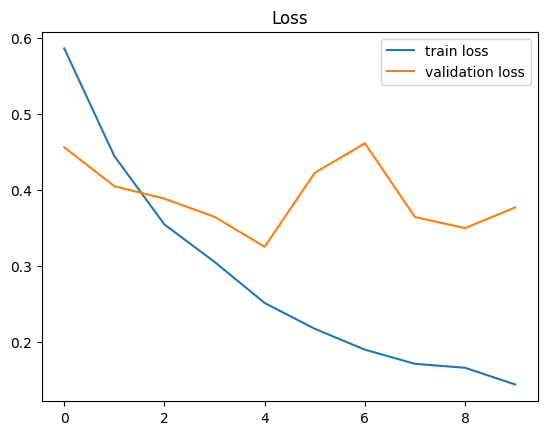

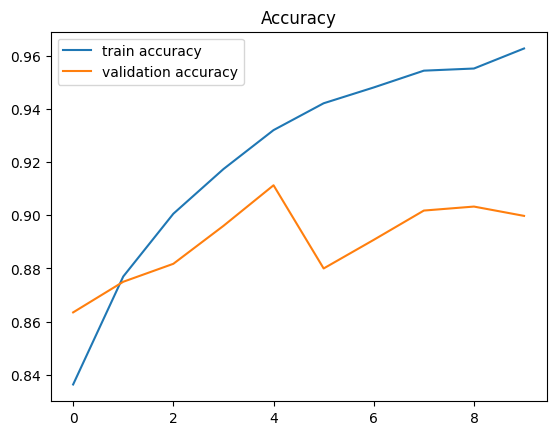

In [52]:
h = history

# Plotting the loss value
plt.title("Loss")
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plotting the accuracy value
plt.title("Accuracy")
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()